Based on a post @ [Towards Data Science](https://towardsdatascience.com/understanding-monte-carlo-simulation-eceb4c9cad4).

# Monte Carlo simulation

> "\[A\] powerful tool for approximating a distribution when deriving the exact one is difficult."

## Probability distributions

> "Every RV is uniquely characterized by its distribution."

>> "For continuous RVs, the probability density function (PDF) shows the density of a continuous RV at a given value. The probability of any given value occurring is zero, so you must integrate over a range of values to find the probability that the RV falls within the specified range."

>> "For discrete RVs, this function is called a probability mass function (PMF) and it returns the probability of a specific value occurring. They describe the pattern and frequency of which we observe a random variable."

In [1]:
from IPython.display import Image

**Probability Density Function (PDF)**:

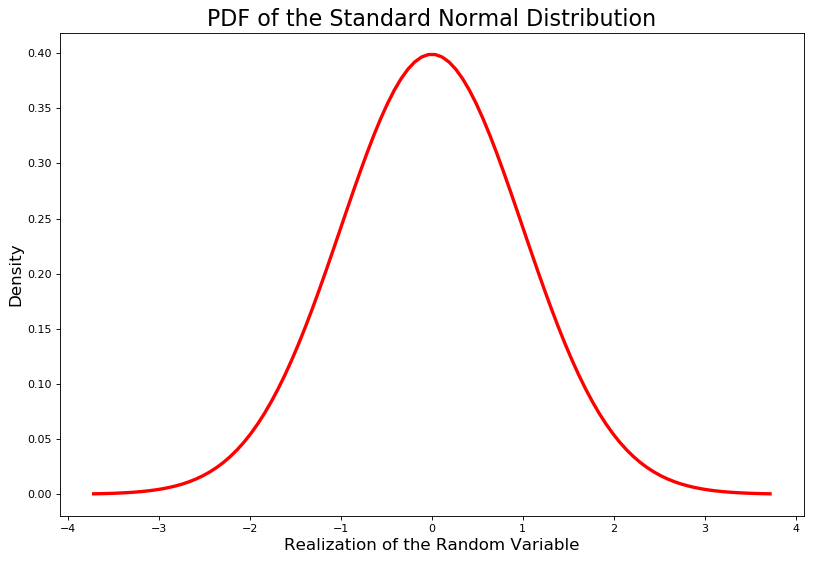

In [2]:
Image('./IMG/pdf-normal.png')

**Probability Mass Function (PMF)**:

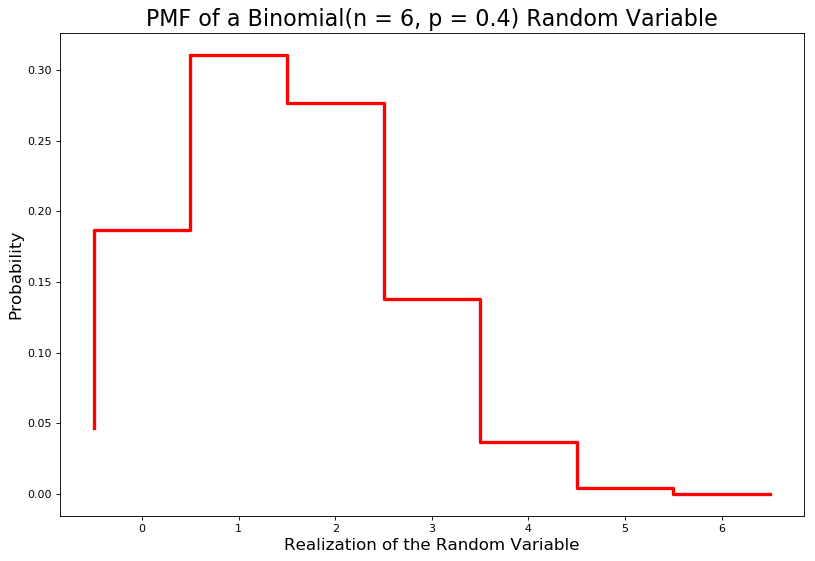

In [3]:
Image('./IMG/pmf-binomial.png')

> "The CDF is simply the cumulative value of the PDF or PMF. It is the probability that the random variable takes on a value less than or equal to the value directly beneath the curve/step-function."

>> "Probabilities must be between 0 and 1, so the CDF ranges between 0 and 1."

>> "It is denoted by $F$."

**Cumulative Distribution Function**:

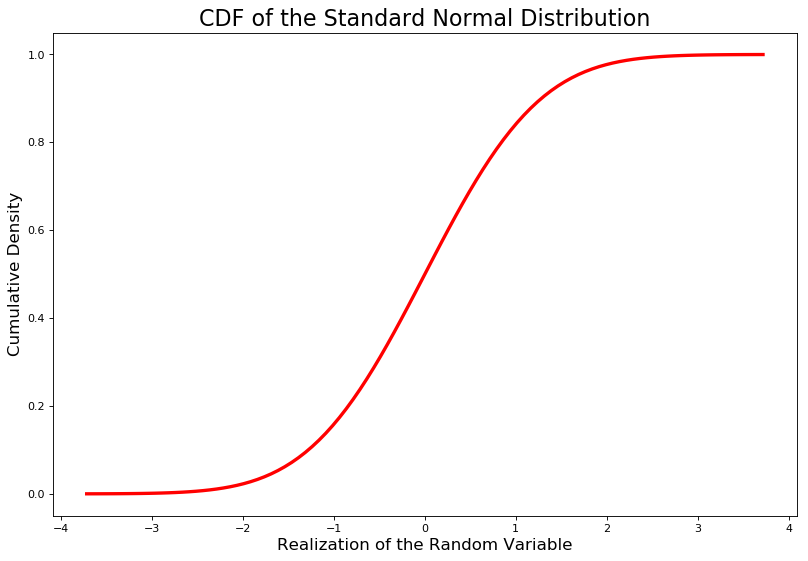

In [4]:
Image('./IMG/cdf-normal.png')

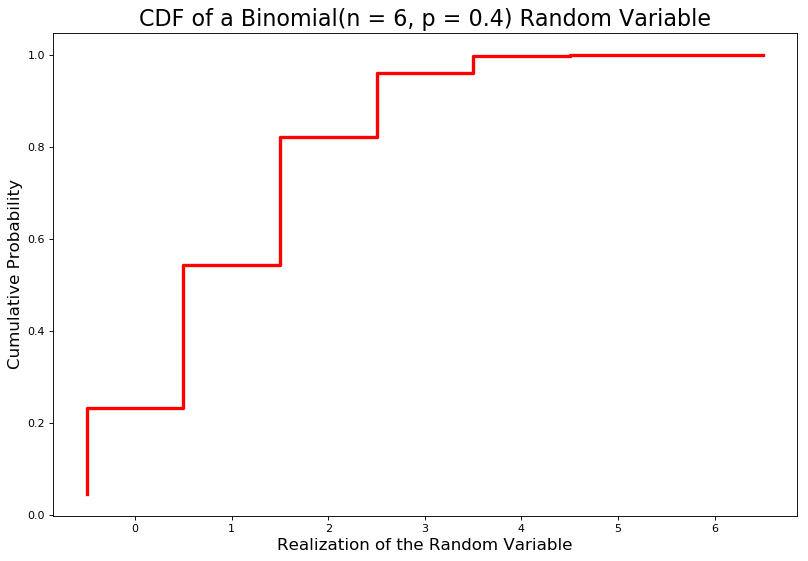

In [5]:
Image('./IMG/cdf-binomial.png')

## Inverse Transform Sampling

More info [here](https://en.wikipedia.org/wiki/Inverse_transform_sampling).

**Let $U \sim \text{ Uniform }(0,1)$ and let $X = F^{-1}(U)$. Then $X$ has CDF $F$**.

> "This means we can feed random variables from the uniform distribution with minimum value 0 and maximum value 1 into the inverse CDF of X to generate random values of X."

##### Example:

"Let’s take the CDF of an Exponential distribution": $F(X) = 1 - e^{-\lambda X}$.

"By defining $U$ as $F(X)$ and solving for $X$, we can find the inverse CDF": $F^{-1}(U) = \lambda \ln (1 - U)$.

"We can now feed $U \sim \text{ Uniform }(0, 1)$ RVs into this inverse CDF to generate random draws from an Exponential distribution."

For $\lambda = 1$:

In [7]:
import numpy as np

In [6]:
def exponentialRVs(rate, n):
    exponential_RVs = []

    for i in range(n):
        exponential_RV = -np.log(1 - np.random.uniform(0,1)) * rate
        exponential_RVs.append(exponential_RV)

    return exponential_RVs

In [13]:
from scipy.stats import expon
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
plt.style.use('ggplot')

In [38]:
rate = 1

exp_sample = exponentialRVs(rate, 10000)

xs = np.linspace(0, max(exp_sample), 1000)
exp_dist = expon.pdf(xs)

More on `scipy.stats.expon` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

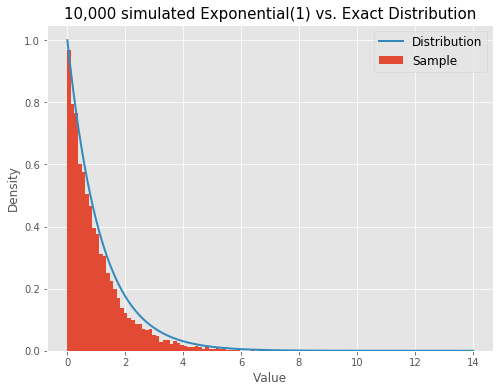

In [68]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(exp_sample, bins=100, density=True, label='Sample')
ax.plot(xs, exp_dist, linewidth=2., label='Distribution')

ax.set_title('10,000 simulated Exponential(1) vs. Exact Distribution', fontsize=15)
ax.set_ylabel('Density', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.legend(prop={'size': 12})

plt.show()

### Approximating the Transformation of a RV

> "Let us generate squared standard normal random variables."

>> "This is actually a Chi-Square(1) RV, which allows us to easily check how good our approximation is by checking the exact distribution."

In [46]:
from scipy.stats import norm, chi2

def gen_std_norm_sq_RV(n):
    std_norm_sq_RVs = []

    for i in range(n):
        std_norm_sq_RV = norm.ppf(np.random.uniform(0,1)) ** 2
        std_norm_sq_RVs.append(std_norm_sq_RV)

    return std_norm_sq_RVs

In [48]:
sq_norm_sample = gen_std_norm_sq_RV(10000)

xs = np.linspace(0, max(sq_norm_sample), 1000)
chi2_dist = chi2.pdf(xs, df=1)

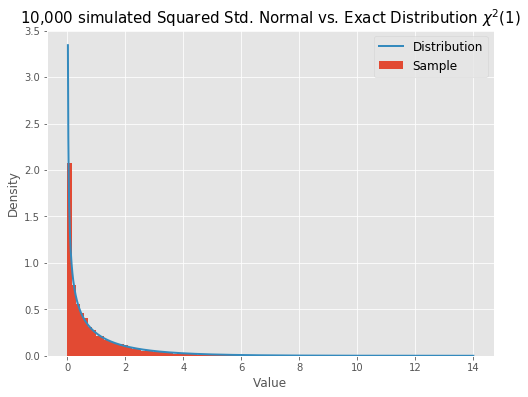

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(sq_norm_sample, bins=100, density=True, label='Sample')
ax.plot(xs, chi2_dist, linewidth=2., label='Distribution')

ax.set_title('10,000 simulated Squared Std. Normal vs. Exact Distribution $\chi^2$(1)', fontsize=15)

ax.set_ylabel('Density', fontsize=12)
ax.set_xlabel('Value', fontsize=12)
ax.legend(prop={'size': 12})

plt.show()

Calculating the proportion $< 1$:

In [62]:
print('Simulated proprotion of sq. std. normal values under 1:   ', (np.array(sq_norm_sample) < 1).mean())
print('Exact proportion from CDF of Chi-squared(1) distribution: ', chi2.cdf(1, df=1))

Simulated proprotion of sq. std. normal values under 1:    0.6832
Exact proportion from CDF of Chi-squared(1) distribution:  0.6826894921370859


### Approximating my Arbitrary RV

**Let $X \sim \chi^2(1), \quad Y \sim \text{ Exponential}\Big(\displaystyle\frac{1}{2}\Big), \quad Z \sim \mathcal N(0,1)$**.

**Let $A = X + Y + Z$**.

In [63]:
def gen_special_RVs(n):
    special_RVs = []

    for _ in range(n):
        special_RV = (norm.ppf(np.random.uniform(0,1)) ** 2 +\
                      expon.ppf(np.random.uniform(0,1), scale=0.5) +\
                      norm.ppf(np.random.uniform(0,1)))

        special_RVs.append(special_RV)

    return special_RVs

In [64]:
A_sample = gen_special_RVs(10000)

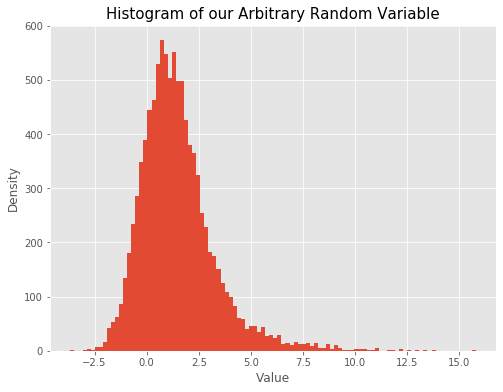

In [70]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(A_sample, bins=100)

ax.set_title('Histogram of our Arbitrary Random Variable', fontsize=15)
ax.set_ylabel('Density', fontsize=12)
ax.set_xlabel('Value', fontsize=12)

plt.show()

***

## Example: Probability of Positive Returns

> "Suppose we know the returns of some security are distributed [Laplace](https://en.wikipedia.org/wiki/Laplace_distribution)$(0.05,0.07)$ and returns next period are not dependent on returns this period."

>> "What’s the probability that our return on investment at period 5 is positive?"

In [71]:
from scipy.stats import laplace

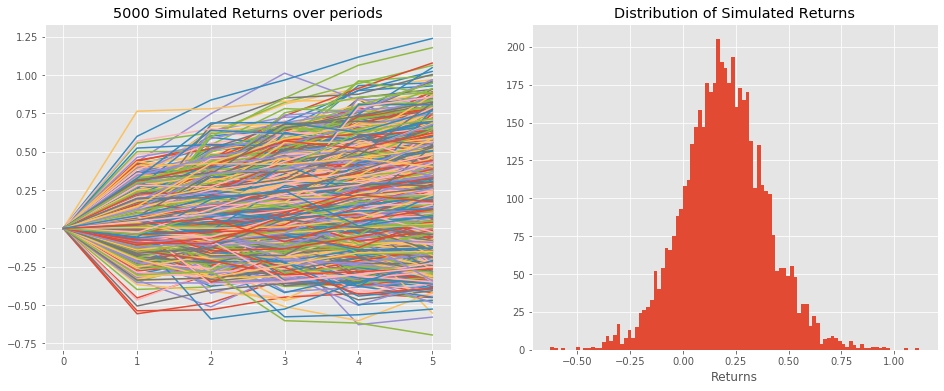

In [78]:
num_sims = 5000
num_periods = 5

final_returns = []

### Plotting
fig, ax = plt.subplots(figsize=(16,6), ncols=2)

for _ in range(num_sims):
    time = [0]
    returns = [0]

    for period in range(1, num_periods + 1):
        time.append(period)
        returns.append(returns[period-1] + laplace.rvs(loc=0.05, scale=0.07, size=1))

    final_returns.append(float(returns[num_periods - 1]))

    ax[0].plot(time, returns)

ax[1].hist(final_returns, bins=100)

ax[0].set_title('5000 Simulated Returns over periods')

ax[1].set_title('Distribution of Simulated Returns')
ax[1].set_xlabel('Returns')

plt.show()

In [80]:
prop = (np.array(final_returns) > 0.0).mean()

In [91]:
print('Proportion of positive returns: ', prop)

Proportion of positive returns:  0.8494


### Bonus application: Monte Carlo Integration

> "In addition to approximating a distribution, Monte Carlo simulation can be used to numerically approximate a definite integral that is difficult or impossible to solve analytically."

>> "It is performed by evaluating the function at realizations of random variables generated from $\text{ Uniform }(a,b)$, where $a$ is the lower bound of the definite integral and $b$ is the upper bound."

>> "These results are then averaged and multiplied by $b-a$ to get an approximation of the integral from $a$ to $b$."

Take $f(x) = \cos (2 \pi x^2)$.

In [157]:
my_func = lambda x: np.cos(2 * np.pi * x**2)

In [158]:
inf_lim = 0.0
sup_lims = np.linspace(inf_lim + 1e-2, 3, 50)

In [159]:
def monte_carlo_integration(n, a, b, func):
    u = np.random.uniform(low=a, high=b, size=n)
    rvs = func(u)
    expected_value = (b-a) * np.average(rvs)

    return expected_value

In [200]:
from scipy.integrate import quad

In [201]:
n = 500000

aprox_int = np.array([monte_carlo_integration(n, inf_lim, sup_lim, my_func) for sup_lim in sup_lims])
exact_int = np.array([quad(my_func, inf_lim, sup_lim)[0] for sup_lim in sup_lims])

errors = (exact_int - aprox_int) / exact_int

In [202]:
mean_err = errors.mean()
std_err = errors.std()

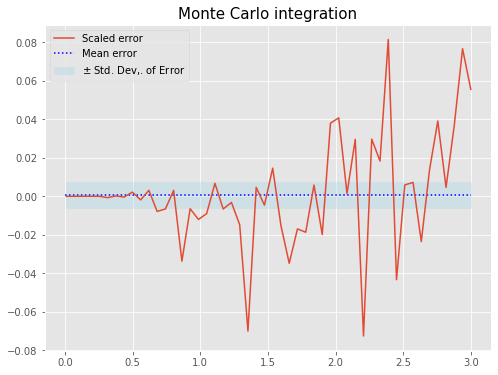

In [205]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(sup_lims, errors/exact_int,
        label='Scaled error')
ax.hlines(y=mean_err, xmin=inf_lim, xmax=sup_lims.max(),
          linestyle='dotted', label='Mean error', color='blue')
ax.fill_between(x=sup_lims, y1=mean_err-std_err, y2=mean_err+std_err,
                alpha=0.4, color='lightblue', label='$\pm$ Std. Dev. of Error')

ax.set_title('Monte Carlo integration', fontsize=15)
ax.legend()
plt.show()